In [1]:
# instalar Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# Descargar la ultima versión de java ( comprobar que existen los path de descarga)
# Download latest release. Update if necessary

!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
# instalar pyspark
!pip install -q pyspark
import os # libreria de manejo del sistema operativo
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
from pyspark.sql import SparkSession

APP_NAME = "PDGE-tutorialSpark1"
SPARK_URL = "local[*]"
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()

sc = spark.sparkContext

     |████████████████████████████████| 212.4 MB 57 kB/s 
     |████████████████████████████████| 198 kB 51.7 MB/s 


In [2]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/gdrive')

!cp "/content/gdrive/My Drive/players.csv" .

Mounted at /content/gdrive


In [3]:
#Read the csv file
players = sc.textFile("players.csv")
# Split lines and keep Name, Team, Age
players = players.map(lambda x : x.split(",")[0:3])
# Create (key,val) with: (team,age_of_player)
players = players.map(lambda x: (x[1],[int(x[2]),int(x[2])**2,1]))

In [4]:
players.sample(fraction=0.018,withReplacement=False).collect()

[('Brighton+and+Hove', [33, 1089, 1]),
 ('Burnley', [29, 841, 1]),
 ('Burnley', [25, 625, 1]),
 ('Chelsea', [34, 1156, 1]),
 ('Crystal+Palace', [21, 441, 1]),
 ('Liverpool', [27, 729, 1]),
 ('Manchester+City', [34, 1156, 1]),
 ('Manchester+United', [25, 625, 1]),
 ('Manchester+United', [29, 841, 1])]

In [5]:
counted_ages = players.reduceByKey(lambda x1,x2: [x1[0]+x2[0],x1[1]+x2[1],x1[2]+x2[2]])

In [6]:
counted_ages.sample(fraction=0.2,withReplacement=False).collect()

[('Swansea', [675, 18595, 25]),
 ('Tottenham', [513, 13363, 20]),
 ('Huddersfield', [728, 19264, 28]),
 ('Stoke+City', [617, 17745, 22])]

In [7]:
# We compute the mean and the std
import math
counted_ages = counted_ages.map(lambda x: (x[0],
                                           [ x[1][0]/x[1][2],
                                            math.sqrt(x[1][1] / x[1][2] - (x[1][0]/x[1][2])**2)
                                            ])
                              )


counted_ages.sample(fraction=0.2,withReplacement=False).collect()

[('Burnley', [27.944444444444443, 2.818041522882772]),
 ('Leicester+City', [27.25, 3.722118572354544]),
 ('Swansea', [27.0, 3.847076812334263]),
 ('Arsenal', [26.678571428571427, 3.37060371265374]),
 ('Everton', [26.214285714285715, 4.738573797320562])]

In [8]:
names = [x[0] for x in counted_ages.collect()]

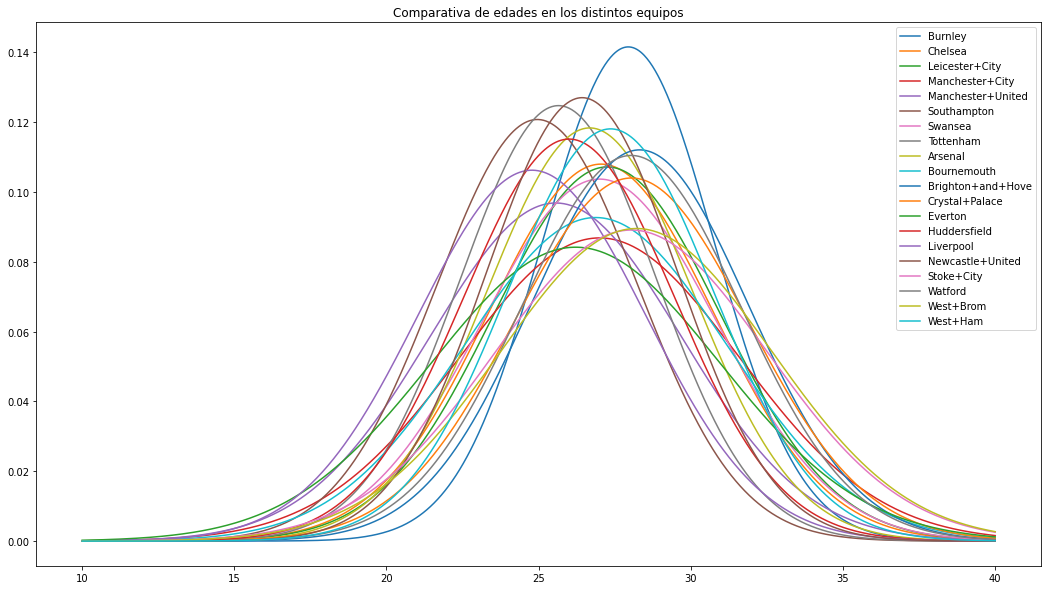

In [14]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
def plot_normal(mu, std, color):
  sigma = std
  x = np.linspace(10, 40, 1000)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

def color_generator(n_colors):
	cm = pylab.get_cmap('gist_rainbow')
	return (cm(1.*i/n_colors) for i in range(n_colors))

color_gen = color_generator(len(names))

plt.figure(figsize=(18, 10))
for team_stats in counted_ages.collect():
	plot_normal(team_stats[1][0], team_stats[1][1], next(color_gen))
plt.legend(names)
plt.title("Comparativa de edades en los distintos equipos")
plt.savefig('/content/gdrive/My Drive/spark.pdf')
plt.show()

In [13]:
!ls /content/gdrive

MyDrive
